Air Quality Data Analysis using the World Air Quality Index Project API.

# Realtime pollution analysis

api : http://api.waqi.info/

Getting the api key: https://aqicn.org/data-platform/token/#/

Getting the data

In [1]:
import requests
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import api_key_1

In [2]:
city = '@8647'
url = 'http://api.waqi.info/feed/' + city + '/?token='
api_key = api_key_1.get_api_key()

main_url = url + api_key
r = requests.get(main_url)
data = r.json()['data']
data

{'aqi': 152,
 'idx': 8647,
 'attributions': [{'url': 'http://www.bmkg.go.id/',
   'name': 'BMKG | Badan Meteorologi, Klimatologi dan Geofisika',
   'logo': 'Indonesia-Badan-Meteorologi-Klimatologi-dan-Geofisika.png'},
  {'url': 'https://waqi.info/', 'name': 'World Air Quality Index Project'}],
 'city': {'geo': [-6.182536, 106.834236],
  'name': 'Jakarta Central (US Consulate), Indonesia',
  'url': 'https://aqicn.org/city/indonesia/jakarta/us-consulate/central',
  'location': ''},
 'dominentpol': 'pm25',
 'iaqi': {'h': {'v': 45.3},
  'p': {'v': 1010.9},
  'pm25': {'v': 152},
  't': {'v': 34.3},
  'w': {'v': 3.9},
  'wg': {'v': 7.8}},
 'time': {'s': '2022-08-20 11:00:00',
  'tz': '+07:00',
  'v': 1660993200,
  'iso': '2022-08-20T11:00:00+07:00'},
 'forecast': {'daily': {'o3': [{'avg': 11,
     'day': '2022-08-18',
     'max': 48,
     'min': 1},
    {'avg': 11, 'day': '2022-08-19', 'max': 38, 'min': 1},
    {'avg': 3, 'day': '2022-08-20', 'max': 10, 'min': 1},
    {'avg': 3, 'day': '2022

Extracting air quality information

In [3]:
aqi = data['aqi']
iaqi = data['iaqi']

del iaqi['p']

for i in iaqi.items():
    print(i[0],':',i[1]['v'])


h : 45.3
pm25 : 152
t : 34.3
w : 3.9
wg : 7.8


In [4]:
dew = iaqi.get('dew','Nil')
no2 = iaqi.get('no2','Nil')
o3 = iaqi.get('o3','Nil')
so2 = iaqi.get('so2','Nil')
pm10 = iaqi.get('pm10','Nil')
pm25 = iaqi.get('pm25','Nil')

print(f'{city} (Jakarta) AQI :', aqi,'\n')
print('Individual Air quality')
print('Dew :', dew)
print('no2 :', no2)
print('Ozone :', o3)
print('sulphur :', so2)
print('pm10 :', so2)
print('pm25 :', pm25)


@8647 (Jakarta) AQI : 152 

Individual Air quality
Dew : Nil
no2 : Nil
Ozone : Nil
sulphur : Nil
pm10 : Nil
pm25 : {'v': 152}


Plotting pollutants graph


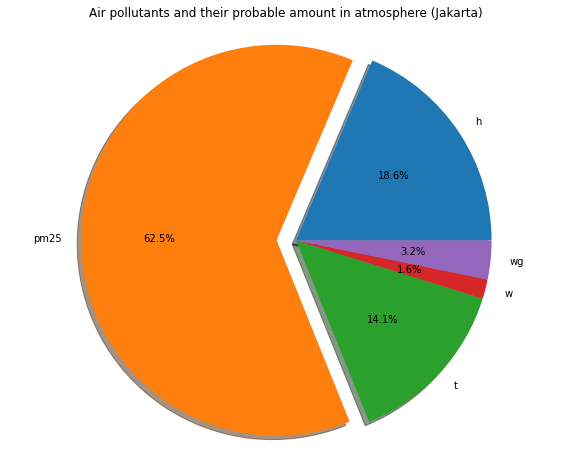

In [5]:
import matplotlib.pyplot as plt

pollutants = [i for i in iaqi]
values = [i['v'] for i in iaqi.values()]


# Exploding the first slice
explode = [0 for i in pollutants]
mx = values.index(max(values))  # explode 1st slice
explode[mx] = 0.1

# Plot a pie chart
plt.figure(figsize=(10, 8))
plt.pie(values, labels=pollutants,explode=explode,autopct='%1.1f%%', shadow=True)

plt.title('Air pollutants and their probable amount in atmosphere (Jakarta)')

plt.axis('equal')
plt.show()


# Historical data analysis

dataset : http://aqicn.org/data-platform/register/

Read csv files into a dataframe

In [6]:
import pandas as pd


csv_path = './data.csv'

df = pd.read_csv(csv_path)
df = df
print(df)

           date  pm25  pm10
0      2022/8/1   105      
1      2022/8/2   141      
2      2022/8/3   150      
3      2022/8/4   101      
4      2022/8/5    92      
...         ...   ...   ...
2411  2015/9/15         104
2412  2015/9/16          81
2413  2015/9/17          93
2414  2015/9/18          86
2415  2015/9/19          86

[2416 rows x 3 columns]


In [7]:
df.columns

Index(['date', ' pm25', ' pm10'], dtype='object')

Renaming column names 

In [8]:
df.columns

df= df.rename(columns = {" pm25": "pm25", 
                         " pm10":"pm10"
                         })

df.columns

Index(['date', 'pm25', 'pm10'], dtype='object')

In [9]:
df.pm10 = df.pm10.str.replace(" ","")
df.pm10 = df.pm10.replace('', 0)
df['pm10'] = pd.to_numeric(df['pm10'])

In [10]:
df.pm25 = df.pm25.str.replace(" ","")
df.pm25 = df.pm25.replace('', 0)
df['pm25'] = pd.to_numeric(df['pm25'])

In [11]:
df['date'] = pd.to_datetime(df.date)

In [12]:
sorted_date_df = df.sort_values('date')
sorted_date_df

,date,pm25,pm10
2369,2015-07-16,0,62
2370,2015-07-17,0,63
2371,2015-07-18,0,60
2372,2015-07-19,0,60
2373,2015-07-20,0,59
...,...,...,...
14,2022-08-15,90,0
15,2022-08-16,128,0
16,2022-08-17,99,0
17,2022-08-18,94,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2416 entries, 0 to 2415
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    2416 non-null   datetime64[ns]
 1   pm25    2416 non-null   int64         
 2   pm10    2416 non-null   int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 56.8 KB


In [14]:
df.pm25 == 0

0       False
1       False
2       False
3       False
4       False
        ...  
2411     True
2412     True
2413     True
2414     True
2415     True
Name: pm25, Length: 2416, dtype: bool

- 0 - 50 = Good                                 | PM 2.5 = 0-12.0
- 51 to 100 = Yellow                            | PM 2.5 = 12.1-35.4
- 101 to 150 = Unhealthy for sensitive group    | PM 2.5 = 35.5-55.4 
- 151 to 200 = Unhealthy                        | PM 2.5 = 55.5-150.4
- 201 to 300 = Very unhealthy                   | PM 2.5 = 150.5-250.4
- 301 to 500 = Hazardous                        | PM 2.5 = 250.5-500.4 

### Get the PM 2.5

In [15]:
pm_df = sorted_date_df[['date', 'pm25']]
pm_df

,date,pm25
2369,2015-07-16,0
2370,2015-07-17,0
2371,2015-07-18,0
2372,2015-07-19,0
2373,2015-07-20,0
...,...,...
14,2022-08-15,90
15,2022-08-16,128
16,2022-08-17,99
17,2022-08-18,94


### Good Category

In [16]:
good_pm25_df = pm_df[pm_df.pm25 <= 12]
good_pm25_df.head(1)

,date,pm25
2369,2015-07-16,0


### Moderate Category

In [17]:
yellow_pm25_df = pm_df.query('pm25 > 12 and pm25 <= 35.4')
yellow_pm25_df.head(1)

,date,pm25
1875,2017-03-15,34


### Unhealthy for Sensitive Group

In [18]:
orange_pm25_df = pm_df.query('pm25 > 35.4 and pm25 <= 55.4')
orange_pm25_df.head(1)

,date,pm25
1955,2016-12-03,48


### Unhealthy

In [19]:
red_pm25_df = pm_df.query('pm25 > 55.4 and pm25 <= 150.4')
red_pm25_df.head(1)

,date,pm25
2256,2015-12-25,69


### Very Unhealthy

In [20]:
purple_pm25_df = pm_df.query('pm25 > 150.4 and pm25 <= 250.4')
purple_pm25_df.head(1)

,date,pm25
2133,2016-05-27,154


### Hazardous

In [21]:
maroon_pm25_df = pm_df.query('pm25 > 250.4 and pm25 <= 500.4')
maroon_pm25_df

,date,pm25


No data on hazardous category 

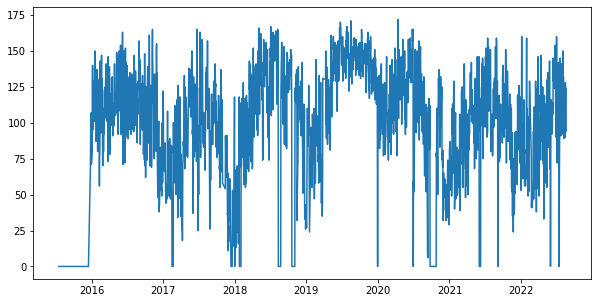

In [22]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(sorted_date_df['date'], sorted_date_df['pm25'])

plt.show()

### Get PM 10

In [23]:
pm10_df = sorted_date_df[['date', 'pm10']]
pm10_df

,date,pm10
2369,2015-07-16,62
2370,2015-07-17,63
2371,2015-07-18,60
2372,2015-07-19,60
2373,2015-07-20,59
...,...,...
14,2022-08-15,0
15,2022-08-16,0
16,2022-08-17,0
17,2022-08-18,0


### Good Category

In [24]:
good_pm10_df = pm10_df[pm10_df.pm10 <= 54]
good_pm10_df.head(1)

,date,pm10
2368,2015-12-15,37


### Moderate Category

In [25]:
moderate_pm10_df = pm10_df.query('pm10 > 54 and pm10 <= 154')
moderate_pm10_df.head(1)

,date,pm10
2369,2015-07-16,62


### Unhealthy for Sensitive Group

In [26]:
orange_pm10_df = pm10_df.query('pm10 > 154 and pm10 <= 254')
orange_pm10_df

,date,pm10
1408,2018-04-06,209
191,2022-01-08,192
199,2022-01-16,250


### Unhealthy

In [27]:
red_pm10_df = pm10_df.query('pm10 > 254')
red_pm10_df

,date,pm10


No data for Unhealthy category

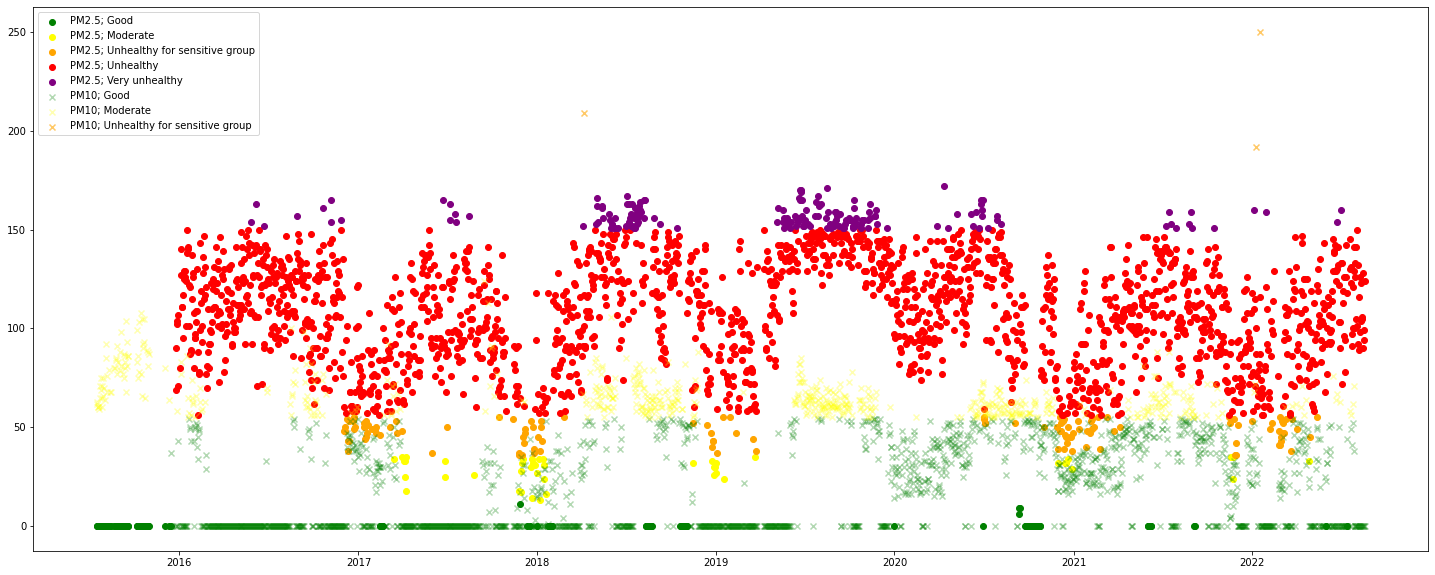

In [45]:
from cProfile import label


fig, ax = plt.subplots(figsize=(25, 10))

ax.scatter(good_pm25_df['date'], good_pm25_df['pm25'],  c='green', label='PM2.5; Good')
ax.scatter(yellow_pm25_df['date'], yellow_pm25_df['pm25'], c='yellow', label='PM2.5; Moderate')
ax.scatter(orange_pm25_df['date'], orange_pm25_df['pm25'], c='orange', label='PM2.5; Unhealthy for sensitive group')
ax.scatter(red_pm25_df['date'], red_pm25_df['pm25'], c='red', label='PM2.5; Unhealthy')
ax.scatter(purple_pm25_df['date'], purple_pm25_df['pm25'], c='purple', label='PM2.5; Very unhealthy')
ax.scatter(good_pm10_df['date'], good_pm10_df['pm10'], c='green', marker="x", alpha=0.3, label='PM10; Good')
ax.scatter(moderate_pm10_df['date'], moderate_pm10_df['pm10'], c='yellow', marker="x", alpha=0.3, label='PM10; Moderate')
ax.scatter(orange_pm10_df['date'], orange_pm10_df['pm10'], c='orange', marker="x", alpha=0.6, label='PM10; Unhealthy for sensitive group')

plt.legend()

plt.show()

Extract dates of lockdown

In [29]:
df['date'] = pd.to_datetime(df.date)

# df21 = df.loc[df['date'] > '2020-03-31']
df21 = df.query('date > "2020-04-01" and date < "2022-05-17"')
df21 = df21.sort_values(by = 'date')
df21

,date,pm25,pm10
723,2020-04-02,94,21
724,2020-04-03,101,39
725,2020-04-04,119,41
726,2020-04-05,132,26
727,2020-04-06,106,17
...,...,...,...
85,2022-05-12,73,29
86,2022-05-13,55,49
87,2022-05-14,122,50
88,2022-05-15,130,44


After masks restriction lifted on 17 May 2022

In [30]:
df_mask_lifted_outdoor = df.query('date > "2022-05-17"')
df_mask_lifted_outdoor = df_mask_lifted_outdoor.sort_values(by = 'date')
df_mask_lifted_outdoor

,date,pm25,pm10
91,2022-05-18,107,0
92,2022-05-19,135,20
93,2022-05-20,104,44
94,2022-05-21,83,0
95,2022-05-22,94,0
...,...,...,...
14,2022-08-15,90,0
15,2022-08-16,128,0
16,2022-08-17,99,0
17,2022-08-18,94,0


Extracting before lockdown

In [31]:
mask = (df['date'] >= '2019-12-31') & (df['date']  < '2020-04-01')

past21 = df.loc[mask]
past21 = past21.sort_values(by='date')
past21.head(1)

,date,pm25,pm10
2308,2019-12-31,0,14


Plotting the data

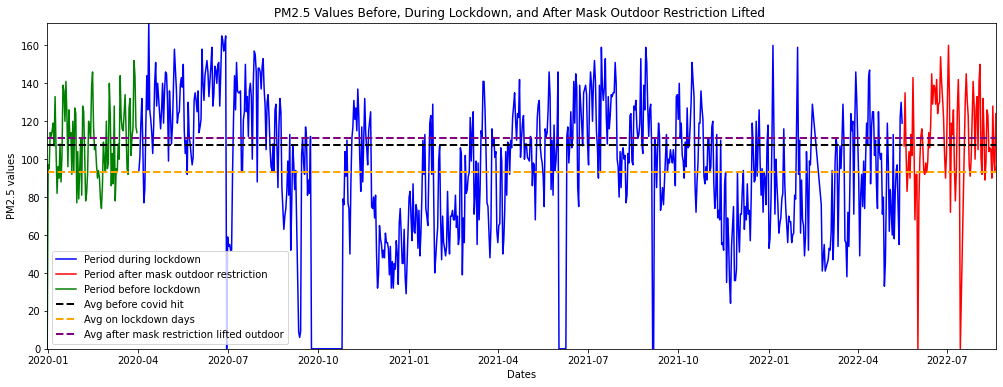

In [50]:
dates = df21['date']
pm25 = df21['pm25']

plt.figure(figsize=(17,6))

length = len(dates)

plt.plot(dates,pm25, c='b', label='Period during lockdown')
plt.plot(df_mask_lifted_outdoor.date, df_mask_lifted_outdoor.pm25, c='r', label='Period after mask outdoor restriction')
plt.plot(past21.date, past21.pm25, c='g', label='Period before lockdown')

plt.axhline(y=past21.pm25.mean(), color='black', linestyle='--', linewidth=2, label='Avg before covid hit')
plt.axhline(y=pm25.mean(), color='orange', linestyle='--', linewidth=2, label='Avg on lockdown days')
plt.axhline(y=df_mask_lifted_outdoor.pm25.mean(), color='purple', linestyle='--', linewidth=2, label='Avg after mask restriction lifted outdoor')

plt.title('PM2.5 Values Before, During Lockdown, and After Mask Outdoor Restriction Lifted ')
plt.xlabel('Dates')
plt.ylabel('PM2.5 values')

plt.margins(0)

plt.legend()

plt.show()

Finding solutions to several questions

- 0 - 50 = Good                                 | PM 2.5 = 0-12.0
- 51 to 100 = Yellow                            | PM 2.5 = 12.1-35.4
- 101 to 150 = Unhealthy for sensitive group    | PM 2.5 = 35.5-55.4 
- 151 to 200 = Unhealthy                        | PM 2.5 = 55.5-150.4
- 201 to 300 = Very unhealthy                   | PM 2.5 = 150.5-250.4
- 301 to 500 = Hazardous                        | PM 2.5 = 250.5-500.4 

In [33]:
# check_pm25_category

def check_pm25_category(values):
    if values <= 12:
        return "good"
    elif values <= 35.4:
        return "moderate"
    elif values <= 55.4:
        return "unhealthy for sensitive group"
    elif values <= 150.4:
        return "unhealthy"
    elif values <= 250.4:
        return "very unhealthy"
    elif values <= 500.4:
        return "hazardous"

def check_pm10_category(values):
    if values <= 54:
        return "good"
    elif values <= 154:
        return "moderate"
    elif values <= 254:
        return "unhealthy for sensitive group"
    elif values <= 354:
        return "unhealthy"
    elif values <= 424:
        return "very unhealthy"
    elif values <= 604:
        return "hazardous"


### Check PM2.5

In [34]:
print(f"Before Lockdown, avg: {round(past21.pm25.mean(), 2), check_pm25_category(past21.pm25.mean())}, max: {past21.pm25.max(), check_pm25_category(past21.pm25.max())}")
print(f"During Lockdown, avg: {round(df21.pm25.mean(), 2), check_pm25_category(df21.pm25.mean())}, max: {df21.pm25.max(), check_pm25_category(df21.pm25.max())}")
print(f"After mask rest. lifted, avg: {round(df_mask_lifted_outdoor.pm25.mean(), 2), check_pm25_category(df_mask_lifted_outdoor.pm25.mean())}, max: {df_mask_lifted_outdoor.pm25.max(), check_pm25_category(df_mask_lifted_outdoor.pm25.max())}")


Before Lockdown, avg: (107.37, 'unhealthy'), max: (152, 'very unhealthy')
During Lockdown, avg: (93.38, 'unhealthy'), max: (172, 'very unhealthy')
After mask rest. lifted, avg: (111.26, 'unhealthy'), max: (160, 'very unhealthy')


### Check PM10

In [35]:
print(f"Before Lockdown, avg: {round(past21.pm10.mean(), 2), check_pm10_category(past21.pm10.mean())}, max: {past21.pm10.max(), check_pm10_category(past21.pm10.max())}")
print(f"During Lockdown, avg: {round(df21.pm10.mean(), 2), check_pm10_category(df21.pm10.mean())}, max: {df21.pm10.max(), check_pm10_category(df21.pm10.max())}")
print(f"After mask rest. lifted, avg: {round(df_mask_lifted_outdoor.pm10.mean(), 2), check_pm10_category(df_mask_lifted_outdoor.pm10.mean())}, max: {df_mask_lifted_outdoor.pm10.max(), check_pm10_category(df_mask_lifted_outdoor.pm10.max())}")

Before Lockdown, avg: (27.18, 'good'), max: (55, 'moderate')
During Lockdown, avg: (37.83, 'good'), max: (250, 'unhealthy for sensitive group')
After mask rest. lifted, avg: (13.12, 'good'), max: (76, 'moderate')
